# Importing Neccessary Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opening my CSV file

In [11]:
dataframe = pd.read_csv("MyDataset.csv")
dataframe

,STUDENTS,HOURS,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601
0,Syed Sahil,45,94,89,87,90,95
1,Shanthosh,44,90,CENTURY,82,100,NaN
2,Anurudh,43,90,92,NaN,102,88
3,Syed Sahil,45,94,89,87,90,95
4,Kavya Swetha,51,94,98,87,99,95
5,Praveen,55,CENTUM,CENT,CENTUM,CENTUM,CENTUM
6,Fowzaan,44,90,95,99,102,88
7,Prasanna,43,190,92,199,CENTUM,818
8,Prasanna,42,190,92,199,CENTUM,818
9,Kavya Swetha,51,94,98,87,99,95


# Data Formatting

In [12]:
dataframe.replace("HALF CENTUM", 50, inplace=True)
dataframe.replace("CENTUM", 100, inplace=True)
dataframe.replace("CENTURY", 100, inplace=True)
dataframe.replace("CENT", 100, inplace=True)
dataframe

,STUDENTS,HOURS,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601
0,Syed Sahil,45,94,89,87,90,95
1,Shanthosh,44,90,100,82,100,NaN
2,Anurudh,43,90,92,NaN,102,88
3,Syed Sahil,45,94,89,87,90,95
4,Kavya Swetha,51,94,98,87,99,95
5,Praveen,55,100,100,100,100,100
6,Fowzaan,44,90,95,99,102,88
7,Prasanna,43,190,92,199,100,818
8,Prasanna,42,190,92,199,100,818
9,Kavya Swetha,51,94,98,87,99,95


# Removal of Duplicates

In [13]:
dataframe.drop_duplicates(inplace=True)
dataframe

,STUDENTS,HOURS,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601
0,Syed Sahil,45,94,89,87,90,95
1,Shanthosh,44,90,100,82,100,NaN
2,Anurudh,43,90,92,NaN,102,88
4,Kavya Swetha,51,94,98,87,99,95
5,Praveen,55,100,100,100,100,100
6,Fowzaan,44,90,95,99,102,88
7,Prasanna,43,190,92,199,100,818
8,Prasanna,42,190,92,199,100,818
10,Sandeep Raman,41,94,100,87,100,95
11,Rupesh,39,90,92,50,97,88


# Conversion of object datatypes to Float
Since the marks section had both strings and integer elements, it is neccessary to convert all marks to floating points for further processing

In [14]:
subjects = ["CS 6301", "CS 6304", "CS 6001", "CS 6007", "CS 6601"]
for i in subjects:
    dataframe[i] = dataframe[i].astype("float")
print(dataframe.dtypes)

STUDENTS     object
HOURS         int64
CS 6301     float64
CS 6304     float64
CS 6001     float64
CS 6007     float64
CS 6601     float64
dtype: object


# Get only neccessary attributes for visualization
We require only hours studied and normalized average for graph plotting. So, now we'll only add hours studied. We'll add average later after calculating it.

In [15]:
study_plot = dataframe[['HOURS']].copy()

# Handling Invalid Values

In [16]:
mask = (dataframe[subjects] > 100) & (~dataframe[subjects].isna())
dataframe = np.where(mask, np.random.randint(85, 101, size=dataframe[subjects].shape), dataframe[subjects])
dataframe = pd.DataFrame(dataframe)
dataframe.columns = subjects
dataframe

,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601
0,94.0,89.0,87.0,90.0,95.0
1,90.0,100.0,82.0,100.0,NaN
2,90.0,92.0,NaN,93.0,88.0
3,94.0,98.0,87.0,99.0,95.0
4,100.0,100.0,100.0,100.0,100.0
5,90.0,95.0,99.0,94.0,88.0
6,90.0,92.0,89.0,100.0,100.0
7,87.0,92.0,87.0,100.0,95.0
8,94.0,100.0,87.0,100.0,95.0
9,90.0,92.0,50.0,97.0,88.0


# Handling Missed Values

In [17]:
dataframe.fillna(dataframe.mean(), inplace=True)
dataframe

,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601
0,94.0,89.000000,87.0000,90.0,95.000
1,90.0,100.000000,82.0000,100.0,93.125
2,90.0,92.000000,87.0625,93.0,88.000
3,94.0,98.000000,87.0000,99.0,95.000
4,100.0,100.000000,100.0000,100.0,100.000
5,90.0,95.000000,99.0000,94.0,88.000
6,90.0,92.000000,89.0000,100.0,100.000
7,87.0,92.000000,87.0000,100.0,95.000
8,94.0,100.000000,87.0000,100.0,95.000
9,90.0,92.000000,50.0000,97.0,88.000


# Total and Average

In [18]:
dataframe['TOTAL'] = dataframe[subjects].sum(axis=1)
dataframe['AVERAGE'] = dataframe[subjects].mean(axis=1)

dataframe

,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601,TOTAL,AVERAGE
0,94.0,89.000000,87.0000,90.0,95.000,455.000000,91.000000
1,90.0,100.000000,82.0000,100.0,93.125,465.125000,93.025000
2,90.0,92.000000,87.0625,93.0,88.000,450.062500,90.012500
3,94.0,98.000000,87.0000,99.0,95.000,473.000000,94.600000
4,100.0,100.000000,100.0000,100.0,100.000,500.000000,100.000000
5,90.0,95.000000,99.0000,94.0,88.000,466.000000,93.200000
6,90.0,92.000000,89.0000,100.0,100.000,471.000000,94.200000
7,87.0,92.000000,87.0000,100.0,95.000,461.000000,92.200000
8,94.0,100.000000,87.0000,100.0,95.000,476.000000,95.200000
9,90.0,92.000000,50.0000,97.0,88.000,417.000000,83.400000


# Normalization of Average Values

In [19]:
min_average = dataframe['AVERAGE'].min()
max_average = dataframe['AVERAGE'].max()

dataframe["NORM_AVERAGE"] = (dataframe['AVERAGE'] - min_average) / (max_average - min_average)
dataframe

,CS 6301,CS 6304,CS 6001,CS 6007,CS 6601,TOTAL,AVERAGE,NORM_AVERAGE
0,94.0,89.000000,87.0000,90.0,95.000,455.000000,91.000000,0.635888
1,90.0,100.000000,82.0000,100.0,93.125,465.125000,93.025000,0.717813
2,90.0,92.000000,87.0625,93.0,88.000,450.062500,90.012500,0.595936
3,94.0,98.000000,87.0000,99.0,95.000,473.000000,94.600000,0.781533
4,100.0,100.000000,100.0000,100.0,100.000,500.000000,100.000000,1.000000
5,90.0,95.000000,99.0000,94.0,88.000,466.000000,93.200000,0.724893
6,90.0,92.000000,89.0000,100.0,100.000,471.000000,94.200000,0.765350
7,87.0,92.000000,87.0000,100.0,95.000,461.000000,92.200000,0.684436
8,94.0,100.000000,87.0000,100.0,95.000,476.000000,95.200000,0.805807
9,90.0,92.000000,50.0000,97.0,88.000,417.000000,83.400000,0.328415


# Get Normalized Average in plotter dataframe

In [20]:
study_plot.reset_index(drop=True, inplace=True)
study_plot["NORM_AVERAGE"] = dataframe["NORM_AVERAGE"]
study_plot

,HOURS,NORM_AVERAGE
0,45,0.635888
1,44,0.717813
2,43,0.595936
3,51,0.781533
4,55,1.000000
5,44,0.724893
6,43,0.765350
7,42,0.684436
8,41,0.805807
9,39,0.328415


# Plotting the Scatter Graph

# Using normal Average

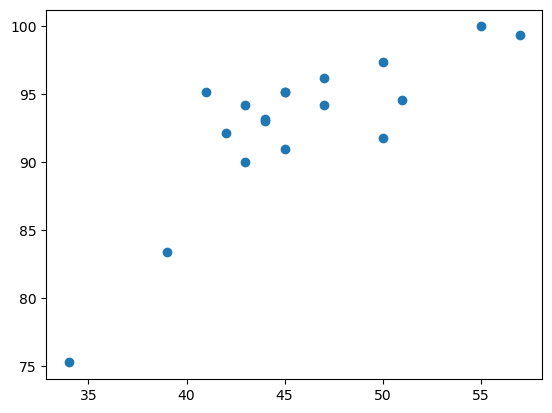

In [21]:
plt.scatter(study_plot['HOURS'], dataframe['AVERAGE'])
plt.show()

# Using Normalized Average

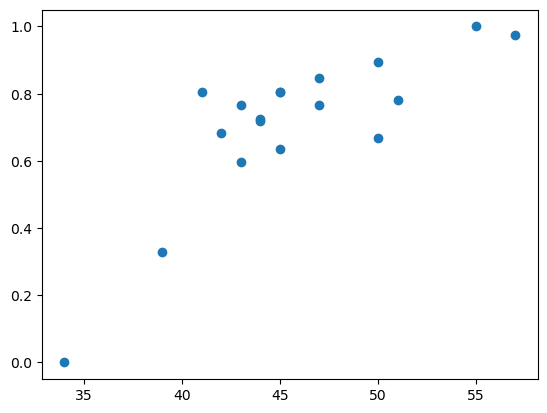

In [22]:
plt.scatter(study_plot['HOURS'], study_plot['NORM_AVERAGE'])
plt.show()